In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 목록과 동일한 구조를 가진 데이터 리스트
file_names = ['view.csv', 'comments.csv', 'like.csv']

# 각 파일에 맞는 Y축 레이블 설정
y_labels = {
    'view.csv': '조회수 (a.u.)',
    'comments.csv': '댓글수 (a.u.)',
    'like.csv': '좋아요 (a.u.)'
}

# Category_id와 Category_name 매핑
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

# 그래프를 저장할 폴더 이름
output_folder = 'graphs'

# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 각 파일에 대해 처리
for file_name in file_names:
    data = pd.read_csv(file_name)
    original_columns = [col for col in data.columns if '_Original' in col]
    
    for column in original_columns:
        # 열 이름에서 숫자 추출하여 카테고리 이름 찾기
        category_id = int(column.split('_')[0])
        category_name = category_mapping.get(category_id, 'Unknown Category')
        
        plt.figure(figsize=(10, 8))
        plt.plot(data['Date'], data[column], color='black', linewidth=3)
        plt.title(category_name, fontsize=20 * 1.5)  # 제목 글씨 크기 2배
        plt.xlabel('시간 (달)', fontsize=12 * 2)  # X축 레이블 글씨 크기 1.5배
        plt.ylabel(y_labels[file_name], fontsize=12 * 2)  # Y축 레이블 글씨 크기 1.5배
        plt.ylim(-0.1, 1.1)  # Y축 범위 설정
        plt.xlim('2020-08-01', '2024-04-01')  # X축 범위 설정
        
        # X축 레이블을 2021년, 2022년, 2023년, 2024년 1월로 설정
        plt.xticks(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'],
                   ['2021-01', '2022-01', '2023-01', '2024-01'], fontsize=10 * 1.8)
        plt.yticks(fontsize=10 * 1.8)

        # X축에 점선 그리기
        for year in ['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']:
            plt.axvline(x=year, color='gray', linestyle='--')

        
        plt.gca().spines['top'].set_linewidth(2)
        plt.gca().spines['right'].set_linewidth(2)
        plt.gca().spines['left'].set_linewidth(2)
        plt.gca().spines['bottom'].set_linewidth(2)
        
        plt.grid(False)  # 기존의 모든 그리드 제거
        
        plt.tight_layout()

        # 그래프를 파일로 저장 (파일 이름은 데이터 열 이름과 일치)
        output_file = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{column}.png")
        plt.savefig(output_file)
        plt.close()

ConversionError: Failed to convert value(s) to axis units: '2021-01-01'

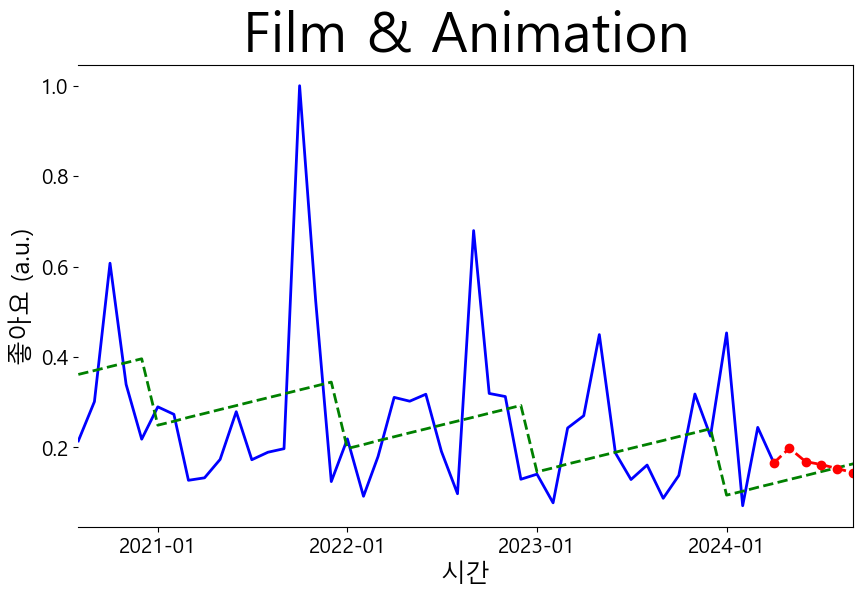

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 파일 목록과 동일한 구조를 가진 데이터 리스트
file_names = ['like.csv']  # 필요에 따라 파일 목록을 추가할 수 있습니다.

# 각 파일에 맞는 Y축 레이블 설정
y_labels = {
    'like.csv': '좋아요 (a.u.)'
}

# Category_id와 Category_name 매핑
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

# 그래프를 저장할 폴더 이름
output_folder = 'graphs_with_trendline_and_prediction'

# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 각 파일에 대해 처리
for file_name in file_names:
    data = pd.read_csv(file_name)
    original_columns = [col for col in data.columns if '_Original' in col]
    
    for column in original_columns:
        # 열 이름에서 숫자 추출하여 카테고리 이름 찾기
        category_id = int(column.split('_')[0])
        category_name = category_mapping.get(category_id, 'Unknown Category')
        
        # 원본 데이터
        dates = pd.to_datetime(data['Date'])
        y = data[column].values

        # 추세선 데이터
        trendline_column = column.replace('Original', 'Trendline')
        trendline = data[trendline_column].values if trendline_column in data.columns else None
        
        # 예측 데이터
        prediction_column = column.replace('Original', 'Prediction')
        prediction = data[prediction_column].dropna().values if prediction_column in data.columns else None
        prediction_dates = dates[-len(prediction):] if prediction is not None else None
        
        plt.figure(figsize=(10, 6))
        
        # 원본 데이터
        plt.plot(dates, y, color='blue', label='원본 데이터', linewidth=2)
        
        # 추세선
        if trendline is not None:
            plt.plot(dates, trendline, color='green', linestyle='--', label='추세선', linewidth=2)
        
        # 예측 데이터 (빨간색 선과 점으로 표현)
        if prediction is not None:
            plt.plot(prediction_dates, prediction, color='red', linestyle='--', marker='o', label='예측 데이터', linewidth=2)
        
        plt.title(f'{category_name}', fontsize=20 * 2)
        plt.xlabel('시간', fontsize=12 * 1.5)
        plt.ylabel(y_labels[file_name], fontsize=12 * 1.5)
        plt.xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2024-09-01'))
        
        plt.xticks(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'],
                   ['2021-01', '2022-01', '2023-01', '2024-01'], fontsize=10 * 1.5)
        plt.yticks(fontsize=10 * 1.5)
        
        plt.gca().spines['left'].set_visible(False)

        # X축에 점선 그리기
        for year in ['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']:
            plt.axvline(x=year, color='gray', linestyle='--', linewidth=1.5)

        plt.gca().spines['top'].set_linewidth(2)
        plt.gca().spines['right'].set_linewidth(2)
        plt.gca().spines['bottom'].set_linewidth(2)

        plt.legend(fontsize=12)
        plt.grid(False)
        plt.tight_layout()

        # 그래프를 파일로 저장
        output_file = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{column}_with_prediction.png")
        plt.savefig(output_file)
        plt.close()


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 파일 목록과 동일한 구조를 가진 데이터 리스트
file_names = ['view.csv', 'comments.csv', 'like.csv']

# 각 파일에 맞는 Y축 레이블 설정
y_labels = {
    'view.csv': '조회수 (a.u.)',
    'comments.csv': '댓글수 (a.u.)',
    'like.csv': '좋아요 (a.u.)'
}

# Category_id와 Category_name 매핑
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

# 그래프를 저장할 폴더 이름
output_folder = 'graphs'

# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 각 파일에 대해 처리
for file_name in file_names:
    data = pd.read_csv(file_name)
    original_columns = [col for col in data.columns if '_Original' in col]
    
    for column in original_columns:
        # 열 이름에서 숫자 추출하여 카테고리 이름 찾기
        category_id = int(column.split('_')[0])
        category_name = category_mapping.get(category_id, 'Unknown Category')
        
        
        # 원본 데이터
        dates = pd.to_datetime(data['Date'])
        y = data[column].values

        # 추세선 데이터
        trendline_column = column.replace('Original', 'Trendline')
        trendline = data[trendline_column].values if trendline_column in data.columns else None
        
        # 예측 데이터 (2024-04 ~ 2024-09)
        prediction_column = column.replace('Original', 'Prediction')
        if prediction_column in data.columns:
            prediction = data[prediction_column].dropna().values
            prediction_dates = pd.date_range(start='2024-04-01', periods=len(prediction), freq='MS')
        else:
            prediction = None
            prediction_dates = None
        
        
        
        plt.figure(figsize=(10, 8))
        # 원본 데이터
        plt.plot(dates, y, color='blue', label='원본 데이터', linewidth=2)
        
        # 추세선
        if trendline is not None:
            plt.plot(dates, trendline, color='green', linestyle='--', label='추세선', linewidth=2)
        
        # 예측 데이터 (빨간색 선과 점으로 표현)
        if prediction is not None and len(prediction) > 0 and len(prediction_dates) > 0:
            plt.plot(prediction_dates, prediction, color='red', linestyle='--', marker='o', label='예측 데이터', linewidth=2)
            
        plt.title(category_name, fontsize=20 * 1.5)  # 제목 글씨 크기 2배
        plt.xlabel('시간 (달)', fontsize=12 * 2)  # X축 레이블 글씨 크기 1.5배
        plt.ylabel(y_labels[file_name], fontsize=12 * 2)  # Y축 레이블 글씨 크기 1.5배
        plt.ylim(-0.1, 1.1)  # Y축 범위 설정
        plt.xlim(pd.to_datetime('2020-08-01'), pd.to_datetime('2024-09-01'))
        
        # X축 레이블을 2021년, 2022년, 2023년, 2024년 1월로 설정
        plt.xticks(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'],
                   ['2021-01', '2022-01', '2023-01', '2024-01'], fontsize=10 * 1.8)
        plt.yticks(fontsize=10 * 1.8)

        for year in pd.to_datetime(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']):
            plt.axvline(x=year, color='gray', linestyle='--', linewidth=1.5)
        
        plt.gca().spines['top'].set_linewidth(2)
        plt.gca().spines['right'].set_linewidth(2)
        plt.gca().spines['left'].set_linewidth(2)
        plt.gca().spines['bottom'].set_linewidth(2)
        
        plt.grid(False)  # 기존의 모든 그리드 제거
        
        plt.tight_layout()

        # 그래프를 파일로 저장 (파일 이름은 데이터 열 이름과 일치)
        output_file = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{column}.png")
        plt.savefig(output_file)
        plt.close()